**References**:


*   Computing Platforms: Set up the Workspace for Machine Learning Projects.  https://ms.pubpub.org/pub/computing
*  Machine Learning for Predictions. https://ms.pubpub.org/pub/ml-prediction
* Machine Learning Packages: https://scikit-learn.org/stable/



# Import and Inspect Data

## import packages

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
plt.style.use('classic')
random.seed(42)

## import train and test data for Classification

In [3]:

C_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Final-Project-Isabella/main/data/Processed_Data/Classification_Train.csv", index_col="Unnamed: 0")
C_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Final-Project-Isabella/main/data/Processed_Data/Classification_Test.csv",index_col="Unnamed: 0")

In [4]:
C_train.isna().sum()

congested          0
theta_past_ma10    1
dtype: int64

## Drop nan for classification Data

In [5]:
C_train =C_train.dropna()

In [6]:
C_train.head()

,congested,theta_past_ma10
1,0,15273399.0
2,1,17471551.5
3,1,22149202.0


In [7]:
C_test.isna().sum()

congested          0
theta_past_ma10    0
dtype: int64

## import train and test data for Regression

In [8]:

R_train = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Final-Project-Isabella/main/data/Processed_Data/Regression_Train.csv", index_col="Unnamed: 0")
R_test = pd.read_csv("https://raw.githubusercontent.com/Rising-Stars-by-Sunshine/Final-Project-Isabella/main/data/Processed_Data/Regression_Test.csv",index_col="Unnamed: 0")

## drop nan for Regression Data

In [9]:
R_train.isna().sum()

theta              0
theta_past_ma10    1
dtype: int64

In [10]:
R_train=R_train.dropna()

In [11]:
R_test.isna().sum()

theta              0
theta_past_ma10    0
dtype: int64

In [12]:
R_train.head()

,theta,theta_past_ma10
1,19669704,15273399.0
2,24628700,17471551.5
3,29338206,22149202.0


In [13]:
R_test.head()

,theta,theta_past_ma10
4,34637650,26983453.0
5,36206000,31987928.0
6,42890481,35421825.0


# Machine Learning Classifier

references:


*   classification report: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


*   ROC AUC: 
 * https://developers.google.com/machine-learning/crash-course/classification/check-your-understanding-roc-and-auc
 * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
  * https://youtu.be/4jRBRDbJemM





## Define the Train and Test (X,y)


In [14]:
C_train.head()

,congested,theta_past_ma10
1,0,15273399.0
2,1,17471551.5
3,1,22149202.0


In [15]:
X_train = pd.DataFrame(np.array(C_train['theta_past_ma10']).astype(float).reshape(-1,1))
y_train = pd.DataFrame(C_train['congested'].astype(int))

In [16]:
C_test.head()

,congested,theta_past_ma10
4,1,26983453.0
5,1,31987928.0
6,1,35421825.0


In [17]:
X_test = pd.DataFrame(np.array(C_test['theta_past_ma10']).astype(float).reshape(-1,1))
y_test = pd.DataFrame(C_test['congested'].astype(int))

## Import base packages

In [18]:
from sklearn.base import BaseEstimator
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

## Decision Tree Classifer

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Model

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
mdl = DecisionTreeClassifier().fit(X_train, y_train)

## Result

In [21]:
y_pred= mdl.predict(X_test)
y_pred

array([1, 1, 1])

## Evaluations

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


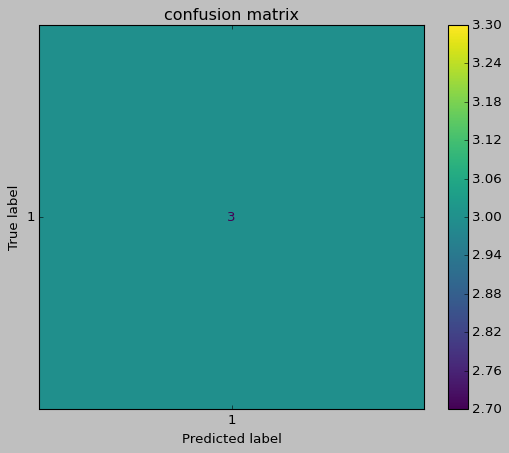

In [23]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:990: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


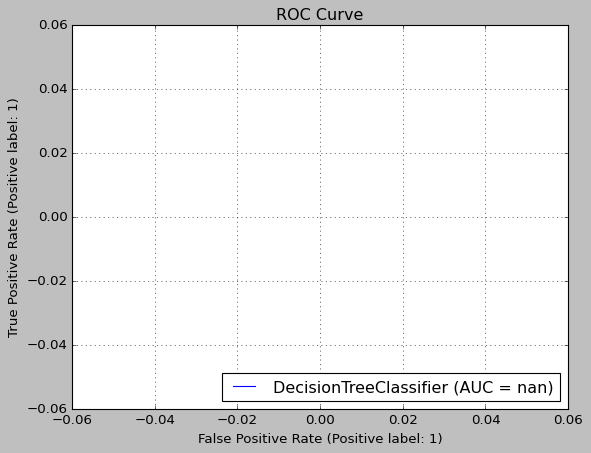

In [24]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Random Forest Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
mdl = RandomForestClassifier().fit(X_train, y_train)

<ipython-input-26-037da15b76a8>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestClassifier().fit(X_train, y_train)


In [27]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


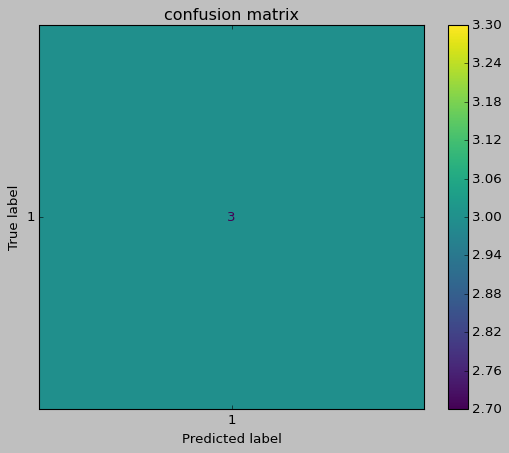

In [28]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:990: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


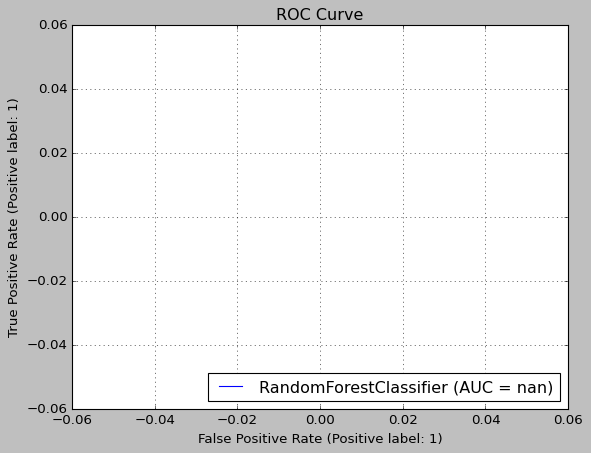

In [29]:
plot_roc_curve(mdl, X_test, y_test)
plt.grid()
plt.title('ROC Curve')
plt.show()

## Multi-Layer Classifier

reference:
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
mdl = MLPClassifier(hidden_layer_sizes=256).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
print(classification_report(y_test, mdl.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


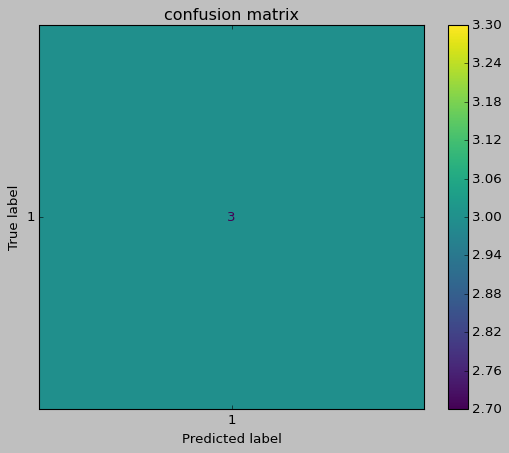

In [33]:
plot_confusion_matrix(mdl, X_test, y_test)
plt.title('confusion matrix')
plt.show()

## Auto-ML Classifier

reference:

https://auto.gluon.ai/stable/index.html

notes: 
* please first install the pacakge and restart run time 
* change runtime type to GPU can accelerate the speed
* after you restart the runtime, please mute the code box for package installation



In [34]:
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 286 kB 36.2 MB/s 
     |████████████████████████████████| 289 kB 74.4 MB/s 
     |████████████████████████████████| 226 kB 77.5 MB/s 
     |████████████████████████████████| 103 kB 81.9 MB/s 
     |████████████████████████████████| 62 kB 896 kB/s 
     |████████████████████████████████| 49 kB 8.1 MB/s 
     |████████████████████████████████| 59 kB 9.3 MB/s 
     |████████████████████████████████| 1.0 MB 31.7 MB/s 
     |████████████████████████████████| 41 kB 602 kB/s 
     |████████████████████████████████| 802 kB 72.2 MB/s 
     |████████████████████████████████| 132 kB 79.5 MB/s 
     |████████████████████████████████| 60.2 MB 1.1 MB/s 
     |████████████████████████████████| 1.6 MB 68.2 MB/s 
     |████████████████████████████████| 280 kB 77.8 MB/s 
     |████████████████████████████████| 14.0 MB 78.1 MB/s 
     |████████████████████████████████

In [35]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [36]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [37]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [38]:
predictor = TabularPredictor(
    path='AutogluonModels/classifier',
    label='target'
).fit(train_data)

# predictor = TabularPredictor.load("AutogluonModels/classifier/")

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/classifier/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    3
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12044.48 MB
	Train Data (Original)  Memory Usage: 0.0 MB (0.0% of available memory)
	Inferring data type of each feature based on

In [39]:
predictor = TabularPredictor.load("AutogluonModels/classifier/")
print(predictor.problem_type)

binary


In [41]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=['accuracy', 'precision','recall','acc','f1'])

,model,score_test,accuracy,precision,recall,f1,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost,1.0,1.0,1.0,1.0,1.0,0.0,0.001585,0.005363,1.200974,0.001585,0.005363,1.200974,1,True,5
1,LightGBM,1.0,1.0,1.0,1.0,1.0,1.0,0.001805,0.001559,0.763685,0.001805,0.001559,0.763685,1,True,2
2,LightGBMXT,1.0,1.0,1.0,1.0,1.0,1.0,0.002283,0.001855,2.667152,0.002283,0.001855,2.667152,1,True,1
3,XGBoost,1.0,1.0,1.0,1.0,1.0,1.0,0.007368,0.004055,1.898381,0.007368,0.004055,1.898381,1,True,9
4,NeuralNetFastAI,1.0,1.0,1.0,1.0,1.0,1.0,0.012664,0.013576,2.871032,0.012664,0.013576,2.871032,1,True,8
5,LightGBMLarge,1.0,1.0,1.0,1.0,1.0,1.0,0.016488,0.002933,0.208507,0.016488,0.002933,0.208507,1,True,10
6,WeightedEnsemble_L2,1.0,1.0,1.0,1.0,1.0,1.0,0.018173,0.003576,0.764150,0.001686,0.000644,0.555643,2,True,11
7,ExtraTreesGini,1.0,1.0,1.0,1.0,1.0,0.0,0.066619,0.069371,1.418218,0.066619,0.069371,1.418218,1,True,6
8,ExtraTreesEntr,1.0,1.0,1.0,1.0,1.0,0.0,0.067033,0.089077,1.592590,0.067033,0.089077,1.592590,1,True,7
9,RandomForestEntr,1.0,1.0,1.0,1.0,1.0,0.0,0.068567,0.067083,1.450296,0.068567,0.067083,1.450296,1,True,4


# Machine Learning Regression

## important global packages

In [42]:
from sklearn.metrics import r2_score

## Define the Train and Test (X, y)

In [43]:
R_train.head()

,theta,theta_past_ma10
1,19669704,15273399.0
2,24628700,17471551.5
3,29338206,22149202.0


In [44]:
X_train = pd.DataFrame(R_train['theta_past_ma10'])
y_train = pd.DataFrame(R_train['theta'])

In [45]:
R_test.head()

,theta,theta_past_ma10
4,34637650,26983453.0
5,36206000,31987928.0
6,42890481,35421825.0


In [46]:
X_test = pd.DataFrame(R_test['theta_past_ma10'])
y_test = pd.DataFrame(R_test['theta'])

## Linear Regression

In [47]:
from sklearn import linear_model

In [48]:
mdl = linear_model.LinearRegression().fit(X_train,y_train)

In [49]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -0.810417943213904


In [50]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,3.621492e+07
1,4.293874e+07
2,4.755239e+07


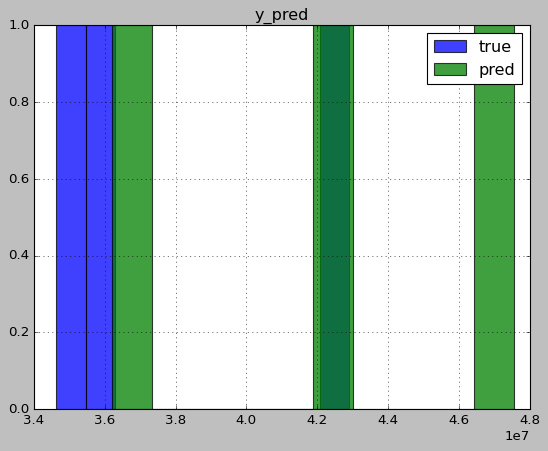

In [51]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Random Forest Regression

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
mdl = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-53-d958d3892696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdl = RandomForestRegressor().fit(X_train, y_train)


In [54]:
# calculate R2
from sklearn.metrics import r2_score

In [55]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')


R2 Score: -8.406103667843833


In [56]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,27536119.22
1,27536119.22
2,27536119.22


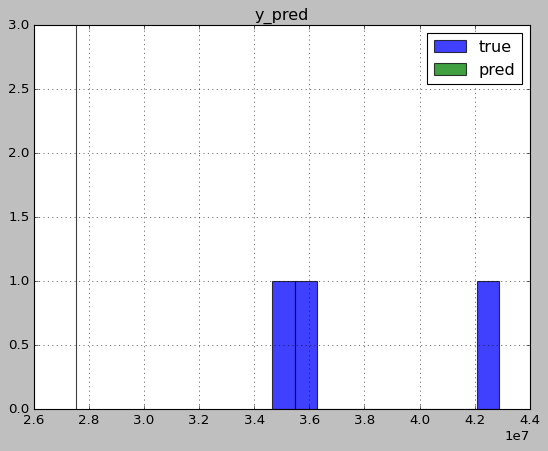

In [57]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


## Auto-ML

In [58]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.values

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test.values

In [59]:
train_data = TabularDataset(train_df)
test_data = TabularDataset(test_df)

In [66]:
predictor = TabularPredictor(
    path='AutogluonModels/regression/',
    label='target'
).fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/regression/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    3
Train Data Columns: 1
Label Column: target
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (29338206, 19669704, 24545536.66667, 4834787.46544)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    12022.12 MB
	Train Data (Original)  Memory Usage: 0.0 MB (0.0% of available memory)
	Inferring 

ValueError: ignored

In [ ]:
predictor = TabularPredictor.load("AutogluonModels/regression/")

In [ ]:
r2 = r2_score(y_test,
              predictor.predict(
                  X_test)
              )
print(f'R2 Score: {r2}')

In [ ]:
y_pred = predictor.predict(X_test)
y_pred

In [ ]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()


In [ ]:
# reference: https://auto.gluon.ai/stable/cheatsheet.html
# https://auto.gluon.ai/0.3.1/api/autogluon.tabular.models.html
predictor.leaderboard(silent=True, data=test_data, extra_metrics=["root_mean_squared_error", "mean_squared_error", "mean_absolute_error", "median_absolute_error", "r2"])

## Add Your Own Analysis

In [61]:
##Stochastic Gradient Descent for Regression
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [62]:
mdl = linear_model.SGDRegressor().fit(X=X_train, y=y_train, coef_init=None, intercept_init=None, sample_weight=None)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [63]:
r2 = r2_score(y_test, mdl.predict(X_test))
print(f'R2 Score: {r2}')

R2 Score: -3.542649021080483e+35


In [64]:
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])
y_pred

,y_pred
0,1.869141e+24
1,2.097584e+24
2,2.390873e+24


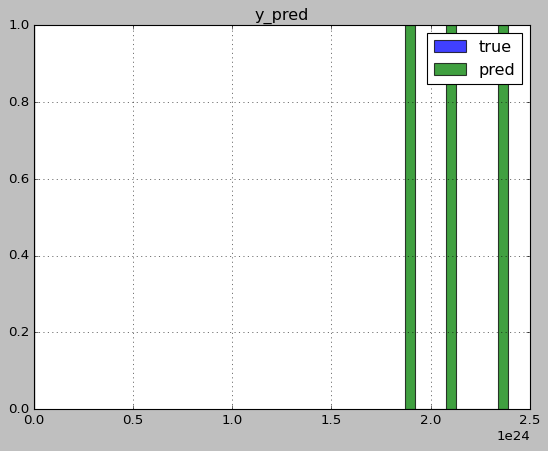

In [65]:
fig, ax = plt.subplots()

y_test.hist(ax=ax, label='true', alpha=.75)
y_pred.hist(ax=ax, label='pred', alpha=.75)

ax.legend()
fig.show()